In [1]:
! pip install -q kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ 
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:41<00:00, 28.6MB/s]
100% 2.70G/2.70G [00:42<00:00, 69.0MB/s]


In [ ]:
! unzip /content/new-plant-diseases-dataset.zip

**Building CNN Based On Architecture**

In [9]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Conv2D(100 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu' , input_shape = (224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'valid' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 38 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 100)     2800      
_________________________________________________________________
batch_normalization_10 (Batc (None, 222, 222, 100)     400       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 100)     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 50)      45050     
_________________________________________________________________
dropout_10 (Dropout)         (None, 109, 109, 50)      0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 109, 109, 50)      200       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 50)       

**Image Preprocessing**

In [14]:
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [24]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [25]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [11]:
train_num = training_set.samples
valid_num = valid_set.samples

In [13]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [16]:
# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
#checkpoint = ModelCheckpoint(monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
#callbacks_list = [checkpoint]

#fitting images to CNN
history = model.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=20,
                         validation_steps=valid_num//batch_size,
                         verbose=1,
                         callbacks = [learning_rate_reduction])
#saving model
filepath="model.hdf5"
model.save(filepath)

Epoch 1/20
549/549 [==============================] - 940s 2s/step - loss: 0.3284 - accuracy: 0.8955 - val_loss: 2.3579 - val_accuracy: 0.6525
Epoch 2/20
549/549 [==============================] - 949s 2s/step - loss: 0.3099 - accuracy: 0.9016 - val_loss: 1.1445 - val_accuracy: 0.7548
Epoch 3/20
549/549 [==============================] - 950s 2s/step - loss: 0.2992 - accuracy: 0.9034 - val_loss: 1.2684 - val_accuracy: 0.7336
Epoch 4/20
549/549 [==============================] - 939s 2s/step - loss: 0.2843 - accuracy: 0.9102 - val_loss: 0.8050 - val_accuracy: 0.7949
Epoch 5/20
549/549 [==============================] - 919s 2s/step - loss: 0.2727 - accuracy: 0.9136 - val_loss: 1.4159 - val_accuracy: 0.7447
Epoch 6/20
549/549 [==============================] - 896s 2s/step - loss: 0.2638 - accuracy: 0.9151 - val_loss: 0.7434 - val_accuracy: 0.8164
Epoch 7/20
549/549 [==============================] - 886s 2s/step - loss: 0.2510 - accuracy: 0.9204 - val_loss: 1.5932 - val_accuracy: 0.7172

**Visualising Training Progress**

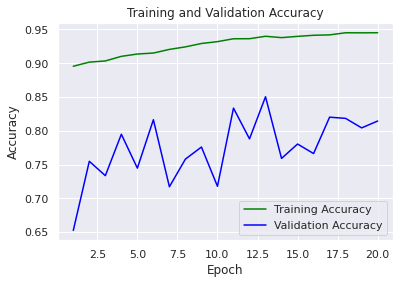

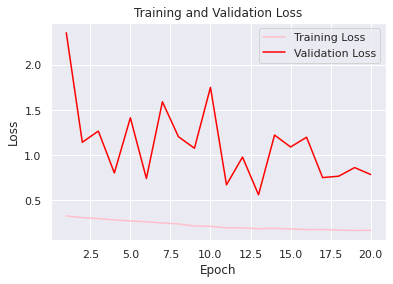

In [18]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Predicting New Test Image(s)**

Following is our prediction:


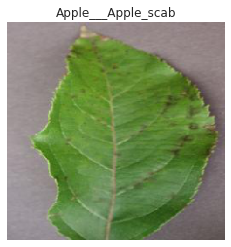

In [26]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/test/test/AppleScab1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:


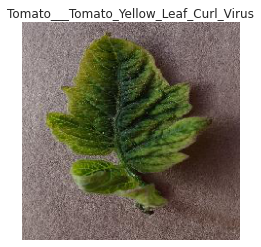

In [28]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/test/test/TomatoYellowCurlVirus1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()